# PARSING PART (Data Collecting)

In [ ]:
import requests
from bs4 import BeautifulSoup
from random import randint
import random
import re
from random import randint
%pip install fake-useragent
from fake_useragent import UserAgent
import time
import json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-py3-none-any.whl size=13502 sha256=7427fd339c22ae605ab82f8696fcbdceeb7cf654c501da17cf2cffeed0a5051f
  Stored in directory: /root/.cache/pip/wheels/ed/f7/62/50ab6c9a0b5567267ab76a9daa9d06315704209b2c5d032031
Successfully built fake-useragent


In [ ]:
import csv
import itertools
import pandas as pd
import numpy as np

In [ ]:
def call_headers():
    ua = UserAgent()
    headers = {
        'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
        'user-agent': ua.random
    }
    return headers

In [29]:
def get_styles_url(url, file_name):
    req = requests.get(url, headers=call_headers())
    soup = BeautifulSoup(req.text, 'html.parser')
    field_a = soup.find('div', id='ba-content').find_all('a')
    styles_links = ['https://www.beeradvocate.com'+link.get('href')+'?sort=revsD&start' for link in field_a[:len(field_a)-1]]
    styles_names = [name.text.strip() for name in field_a]
    with open(file_name+".json", "w") as outfile:
        json.dump(dict(zip(styles_names, styles_links)), outfile)

In [31]:
get_styles_url('https://www.beeradvocate.com/beer/styles/', 'links_per_style')

In [32]:
def json_to_list(file_name):
    list_of_links = []
    with open(file_name) as value:
        dictionary = json.load(value)
        for iterator in dictionary:
            list_of_links.append(dictionary[iterator])
    return list_of_links

In [33]:
json_to_list('/content/Parsed Data/links_per_style.json')

['https://www.beeradvocate.com/beer/styles/32/?sort=revsD&start',
 'https://www.beeradvocate.com/beer/styles/35/?sort=revsD&start',
 'https://www.beeradvocate.com/beer/styles/36/?sort=revsD&start',
 'https://www.beeradvocate.com/beer/styles/33/?sort=revsD&start',
 'https://www.beeradvocate.com/beer/styles/92/?sort=revsD&start',
 'https://www.beeradvocate.com/beer/styles/86/?sort=revsD&start',
 'https://www.beeradvocate.com/beer/styles/73/?sort=revsD&start',
 'https://www.beeradvocate.com/beer/styles/119/?sort=revsD&start',
 'https://www.beeradvocate.com/beer/styles/74/?sort=revsD&start',
 'https://www.beeradvocate.com/beer/styles/75/?sort=revsD&start',
 'https://www.beeradvocate.com/beer/styles/57/?sort=revsD&start',
 'https://www.beeradvocate.com/beer/styles/18/?sort=revsD&start',
 'https://www.beeradvocate.com/beer/styles/68/?sort=revsD&start',
 'https://www.beeradvocate.com/beer/styles/47/?sort=revsD&start',
 'https://www.beeradvocate.com/beer/styles/147/?sort=revsD&start',
 'https:

In [34]:
def get_substyle_describtion(file_name, list_of_links_per_style):
    fields = ['BeerStyle', 'StyleDescribtion', 'StyleABV', 'StyleIBU'] 
    style_describtions = []
    for url in list_of_links_per_style:
        req = requests.get(url, headers=call_headers())
        soup = BeautifulSoup(req.text, 'html.parser')

        style_name = soup.find('div', class_='titleBar').text.strip()
        try:
            style_description = soup.select_one('div[style="font-size:1.2em; padding:2px; margin-bottom:10px;"]').text
        except:
            style_description = 'Not Given'
        try:
            style_abv = soup.find_all('span', class_='Tooltip')[0].text.split(' ')[1].rstrip("%").strip()
        except:
            style_abv = 'Not Given'
        try:
            style_ibu = soup.find_all('span', class_='Tooltip')[1].text.split(' ')[1].strip()
        except:
            style_ibu = 'Not Given'
        style_describtions.append([style_name, style_description[0:style_description.index("ABV")].replace('\n', ''), style_abv, style_ibu])
        time.sleep(randint(1,2))
    with open(file_name, 'w') as f:
        write = csv.writer(f, delimiter = ";")
        write.writerow(fields)
        write.writerows(style_describtions)

In [ ]:
get_substyle_describtion('styles_and_attributes.csv', json_to_list('/content/Parsed Data/links_per_style.json'))

In [38]:
def json_to_dict(file_name):
    list_of_links = []
    with open(file_name) as value:
        dictionary = json.load(value)
    return dictionary

In [39]:
dict_of_l = json_to_dict('/content/Parsed Data/links_per_style.json')
del dict_of_l['American IPA']
del dict_of_l['New England IPA']
dict_of_l

{'Bock': 'https://www.beeradvocate.com/beer/styles/32/?sort=revsD&start',
 'Doppelbock': 'https://www.beeradvocate.com/beer/styles/35/?sort=revsD&start',
 'Eisbock': 'https://www.beeradvocate.com/beer/styles/36/?sort=revsD&start',
 'Maibock': 'https://www.beeradvocate.com/beer/styles/33/?sort=revsD&start',
 'Weizenbock': 'https://www.beeradvocate.com/beer/styles/92/?sort=revsD&start',
 'Altbier': 'https://www.beeradvocate.com/beer/styles/86/?sort=revsD&start',
 'American Brown Ale': 'https://www.beeradvocate.com/beer/styles/73/?sort=revsD&start',
 'Belgian Dark Ale': 'https://www.beeradvocate.com/beer/styles/119/?sort=revsD&start',
 'English Brown Ale': 'https://www.beeradvocate.com/beer/styles/74/?sort=revsD&start',
 'English Dark Mild Ale': 'https://www.beeradvocate.com/beer/styles/75/?sort=revsD&start',
 'Dubbel': 'https://www.beeradvocate.com/beer/styles/57/?sort=revsD&start',
 'Roggenbier': 'https://www.beeradvocate.com/beer/styles/18/?sort=revsD&start',
 'Scottish Ale': 'https://

In [40]:
def get_all_beers_url(start, end, dict_of_url, file_name):
    parts = list(dict_of_url.keys())
    dict_of_links = {}
    for name in parts[start:end]:
        print(name)
        my_list = []
        req = requests.get(dict_of_url[name], headers=call_headers())
        soup = BeautifulSoup(req.text, 'html.parser')
        page_counts = int(soup.select_one('span[style="color: #FFFFFF"]').text.strip().split('(')[1].split(' ')[2].rstrip(')'))
        for i in range(0, page_counts, 50):
            page_req = requests.get(dict_of_url[name]+'='+str(i), headers=call_headers())
            page_soup = BeautifulSoup(page_req.text, 'html.parser')
            all_tr = page_soup.find_all('tr')
            a_list = [a.find_all('a')[0] for a in all_tr[3:len(all_tr)-1]]
            link_list = ['https://www.beeradvocate.com'+link.get('href') for link in a_list]
            my_list.append(link_list)
            time.sleep(randint(1,5))
        dict_of_links[name] = list(set(itertools.chain(*my_list)))
        time.sleep(randint(1,3))
    with open(file_name+".json", "w") as outfile:
        json.dump(dict_of_links, outfile)

In [ ]:
get_all_beers_url(0, 60, dict_of_l, 'beers_url_dataset')

Bock
Doppelbock
Eisbock
Maibock
Weizenbock
Altbier
American Brown Ale
Belgian Dark Ale
English Brown Ale
English Dark Mild Ale
Dubbel
Roggenbier
Scottish Ale
Winter Warmer
American Amber / Red Lager
Czech Amber Lager
Czech Dark Lager
European Dark Lager
Märzen
Munich Dunkel
Rauchbier
Schwarzbier
Vienna Lager
Bière de Champagne / Bière Brut
Braggot
California Common / Steam Beer
Cream Ale
Belgian IPA
Black IPA
Brut IPA
English IPA
Imperial IPA
Milkshake IPA
American Amber / Red Ale
American Blonde Ale
American Pale Ale
Belgian Blonde Ale
Belgian Pale Ale
Bière de Garde
English Bitter
English Pale Ale
English Pale Mild Ale
Extra Special / Strong Bitter (ESB)
Grisette
Irish Red Ale
Kölsch
Saison
American Adjunct Lager
American Lager
Bohemian / Czech Pilsner
Czech Pale Lager
European / Dortmunder Export Lager
European Pale Lager
European Strong Lager
Festbier / Wiesnbier
German Pilsner
Helles
Imperial Pilsner
India Pale Lager (IPL)
Kellerbier / Zwickelbier


In [41]:
# Choose styles with 1000- rows, because it will take hours to scrap it or website may ban me
res = {k: v for (k, v) in json_to_dict('/content/Parsed Data/beers_url_dataset.json').items() if len(v) < 1000}
for i in res.keys():
    print(len(res[i]))

598
840
60
610
251
491
150
612
406
607
90
465
599
711
46
168
591
687
256
904
48
132
279
552
341
715
673
699
700
311
691
961
215
765
163
914
833
67
265
192
435
151
712
706


In [42]:
def get_unuique_beer_data(dict_of_url):
    my_list = []
    for name in dict_of_url:
        for url in dict_of_url[name]:
            req = requests.get(url, headers=call_headers())
            soup = BeautifulSoup(req.text, 'html.parser')
            try:
                beer_name = soup.find('title').text.split('|')[0].strip()
            except:
                beer_name = 'Not Given'
            try:
                brewery_name = soup.find('title').text.split('|')[1].strip()
            except:
                brewery_name = 'Not Given'
            try:
                brewery_region = soup.find_all('dd', class_='beerstats')[1].text.strip()
            except:
                brewery_region = 'Not Given'
            try:
                beer_style = soup.find_all('dd', class_='beerstats')[2].find_all('a', class_='Tooltip')[0].text.strip()
            except:
                beer_style = 'Not Given'
            try:
                beer_style_rank = int(soup.find_all('dd', class_='beerstats')[2].find_all('a', class_='Tooltip')[1].text.strip().split('#')[1])
            except:
                beer_style_rank = 'Not Given'
            try:
                beer_abv = float(soup.find_all('span', class_='Tooltip')[3].text.rstrip("%").strip())
            except:
                beer_abv = 0
            try:
                beer_score = int(soup.find('span', class_='ba-score Tooltip').text.strip())
            except:
                beer_score = 'Not Given'
            try:
                beer_score_rank = int(soup.find_all('dd', class_='beerstats')[4].find('a', class_='Tooltip').text.strip().split('#')[1].replace(",", ""))
            except:
                beer_score_rank = 'Not Given'
            try:
                beer_avg = float(soup.find('span', class_='ba-ravg Tooltip').text.strip())
            except:
                beer_avg = 0
            try:
                beer_reviews = int(soup.find('span', class_='ba-reviews Tooltip').text.strip().replace(",", ""))
            except:
                beer_reviews = 0
            try:
                beer_ratings = int(soup.find('span', class_='ba-ratings Tooltip').text.strip().replace(",", ""))
            except:
                beer_ratings = 0
            try:
                beer_wants = int(soup.find('span', class_='ba-wants Tooltip').text.strip().replace(",", ""))
            except:
                beer_wants = 0
            try:
                beer_gots = int(soup.find('span', class_='ba-gots Tooltip').text.strip().replace(",", ""))
            except:
                beer_gots = 0
            try:
                beer_notes = soup.select_one('div[style="clear:both; margin:0; padding:0px 20px; font-size:1.05em;"]').text.strip().replace('Notes:', '').replace('\n', '')
            except:
                beer_notes = 'Not Given'
            my_list.append([beer_name, brewery_name, brewery_region, beer_style, beer_style_rank, beer_abv, beer_score, beer_score_rank, beer_avg, beer_reviews, beer_ratings, beer_wants, beer_gots, beer_notes])
        print(name)
        time.sleep(randint(6,10))
    df = pd.DataFrame(my_list, columns =['BeerName', 'BreweryName', 'BreweryRegion', 'BeerStyle', 'BeerStyleRank', 'BeerABV', 'BeerScore', 'BeerScoreRank', 'BeerAvg', 'BeerReviews', 'BeerRating', 'BeerWants', 'BeerGots', 'BeerNotes'])
    print(df)
    df.to_csv('beers_dataset.csv', index=False)

In [ ]:
get_unuique_beer_data(res)

# DATA EXPLORATION

In [28]:
# Loading dataset.
pd.set_option('expand_frame_repr', False)

def load_datasets_and_merge():
    df_of_beers = pd.read_csv("/content/Parsed Data/beers_dataset.csv")
    df_of_styles = pd.read_csv("/content/Parsed Data/styles_and_attributes_only.csv", sep=';')
    df = pd.merge(df_of_beers, df_of_styles, validate ="many_to_one")
    return df


raw_beers_df = load_datasets_and_merge()

In [ ]:
# Make summarize to our dataset.

def print_summarize_dataset(dataset):
    print("Dataset dimension:")
    print(dataset.shape)
    print("First 10 rows of dataset:")
    print(dataset.head(10))
    print("Statistical summary:")
    print(dataset.describe())


print_summarize_dataset(raw_beers_df)

Dataset dimension:
(20596, 17)
First 10 rows of dataset:
                 BeerName                          BreweryName                 BreweryRegion BeerStyle BeerStyleRank  BeerABV  BeerScore BeerScoreRank  BeerAvg  BeerReviews  BeerRating  BeerWants  BeerGots                                          BeerNotes                                   StyleDescribtion StyleABV StyleIBU
0   Schmidt's And Giggles           Powderhaus Brewing Company          Idaho, United States      Bock     Not Given      6.5  Not Given     Not Given     3.61            2           0          0         0                                               None  Bock is a bottom fermenting lager that general...  6.3-7.6    20-30
1                Burkhart                   Schilling Beer Co.  New Hampshire, United States      Bock            12      7.0         89         11387     4.07            2          11          0         0  Burkhart is our interpretation of a strong Ger...  Bock is a bottom fermenting lager

In [ ]:
def clean_dataframe(df):
    df.replace({'BeerStyleRank':{'Not Given':0, 'None':0}, 'BeerScore':{'Not Given':0, 'None':0}, 'BeerScoreRank':{'Not Given':0, 'None':0}}, inplace=True)
    df['BeerStyleRank'] = df['BeerStyleRank'].astype(int)
    df['BeerScore'] = df['BeerScore'].astype(int)
    df['BeerScoreRank'] = df['BeerScoreRank'].astype(int)
    df = df.replace(['Not Given', 'None'], np.nan)
    df['BreweryRegion'].fillna(df['BreweryRegion'].mode()[0], inplace=True)
    df['BeerStyle'].fillna(df['BeerStyle'].mode()[0], inplace=True)
    df.replace({'BeerStyleRank': {0: int(df['BeerStyleRank'].mean())}, 'BeerScore': {0: int(df['BeerScore'].mean())}, 'BeerScoreRank': {0: int(df['BeerScoreRank'].mean())}, 'BeerReviews': {0: int(df['BeerReviews'].mean())}, 'BeerRating': {0: int(df['BeerRating'].mean())}, 'BeerWants': {0: int(df['BeerWants'].mean())}, 'BeerGots': {0: int(df['BeerGots'].mean())}}, inplace=True)
    df['BeerNotes'].fillna('In Progress', inplace=True)
    return df


ideal_beers_df = clean_dataframe(raw_beers_df)

In [ ]:
print(ideal_beers_df.head())

                BeerName                  BreweryName                 BreweryRegion BeerStyle  BeerStyleRank  BeerABV  BeerScore  BeerScoreRank  BeerAvg  BeerReviews  BeerRating  BeerWants  BeerGots                                          BeerNotes                                   StyleDescribtion StyleABV StyleIBU
0  Schmidt's And Giggles   Powderhaus Brewing Company          Idaho, United States      Bock             10      6.5         15           3423     3.61            2          25          2         7                                        In Progress  Bock is a bottom fermenting lager that general...  6.3-7.6    20-30
1               Burkhart           Schilling Beer Co.  New Hampshire, United States      Bock             12      7.0         89          11387     4.07            2          11          2         7  Burkhart is our interpretation of a strong Ger...  Bock is a bottom fermenting lager that general...  6.3-7.6    20-30
2               In Bloom       Shep's Brewi

In [ ]:
# Check dataset for missing(NaN) values.

ideal_beers_df.isnull().sum()

BeerName            0
BreweryName         0
BreweryRegion       0
BeerStyle           0
BeerStyleRank       0
BeerABV             0
BeerScore           0
BeerScoreRank       0
BeerAvg             0
BeerReviews         0
BeerRating          0
BeerWants           0
BeerGots            0
BeerNotes           0
StyleDescribtion    0
StyleABV            0
StyleIBU            0
dtype: int64

In [ ]:
ideal_beers_df.describe()

,BeerStyleRank,BeerABV,BeerScore,BeerScoreRank,BeerAvg,BeerReviews,BeerRating,BeerWants,BeerGots
count,20596.000000,20596.000000,20596.000000,20596.000000,20596.000000,20596.000000,20596.000000,20596.000000,20596.000000
mean,18.920470,5.880598,28.015586,6289.248058,3.047719,21.715964,35.041561,3.992717,12.512672
std,30.379468,1.635793,26.994021,7179.708088,1.502116,95.725802,177.634774,21.432835,58.325951
min,1.000000,0.000000,15.000000,230.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,10.000000,5.000000,15.000000,3423.000000,3.170000,1.000000,1.000000,2.000000,7.000000
50%,10.000000,5.500000,15.000000,3423.000000,3.720000,15.000000,15.000000,2.000000,7.000000
75%,10.000000,6.700000,15.000000,3423.000000,3.950000,15.000000,25.000000,2.000000,7.000000
max,307.000000,30.860000,99.000000,30783.000000,5.000000,2578.000000,5508.000000,1477.000000,2152.000000


# DATA VISUALIZATION

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

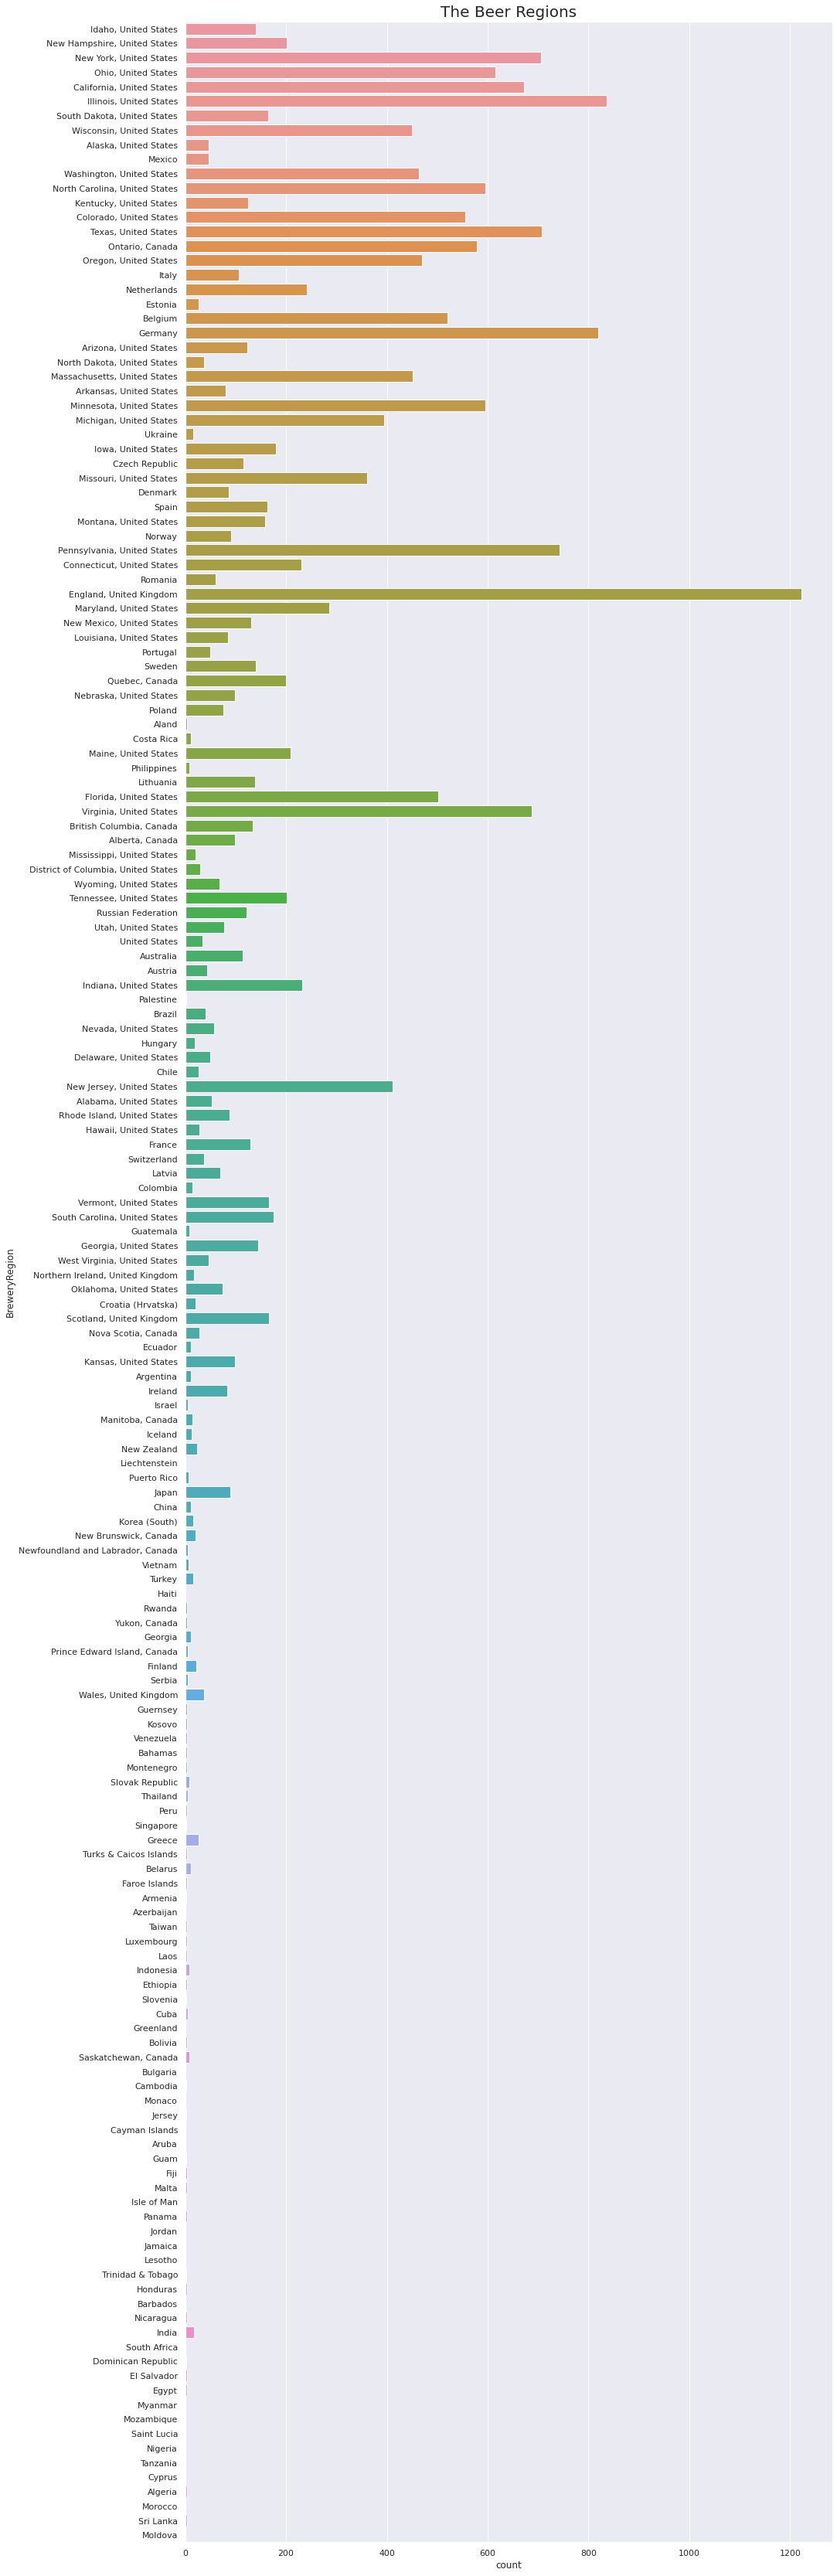

In [ ]:
def get_beer_region(dataframe):
    plt.figure(figsize=(15, 60))
    plt.title('The Beer Regions', fontsize = 20)
    sns.countplot(y='BreweryRegion', data=dataframe)


get_beer_region(ideal_beers_df)

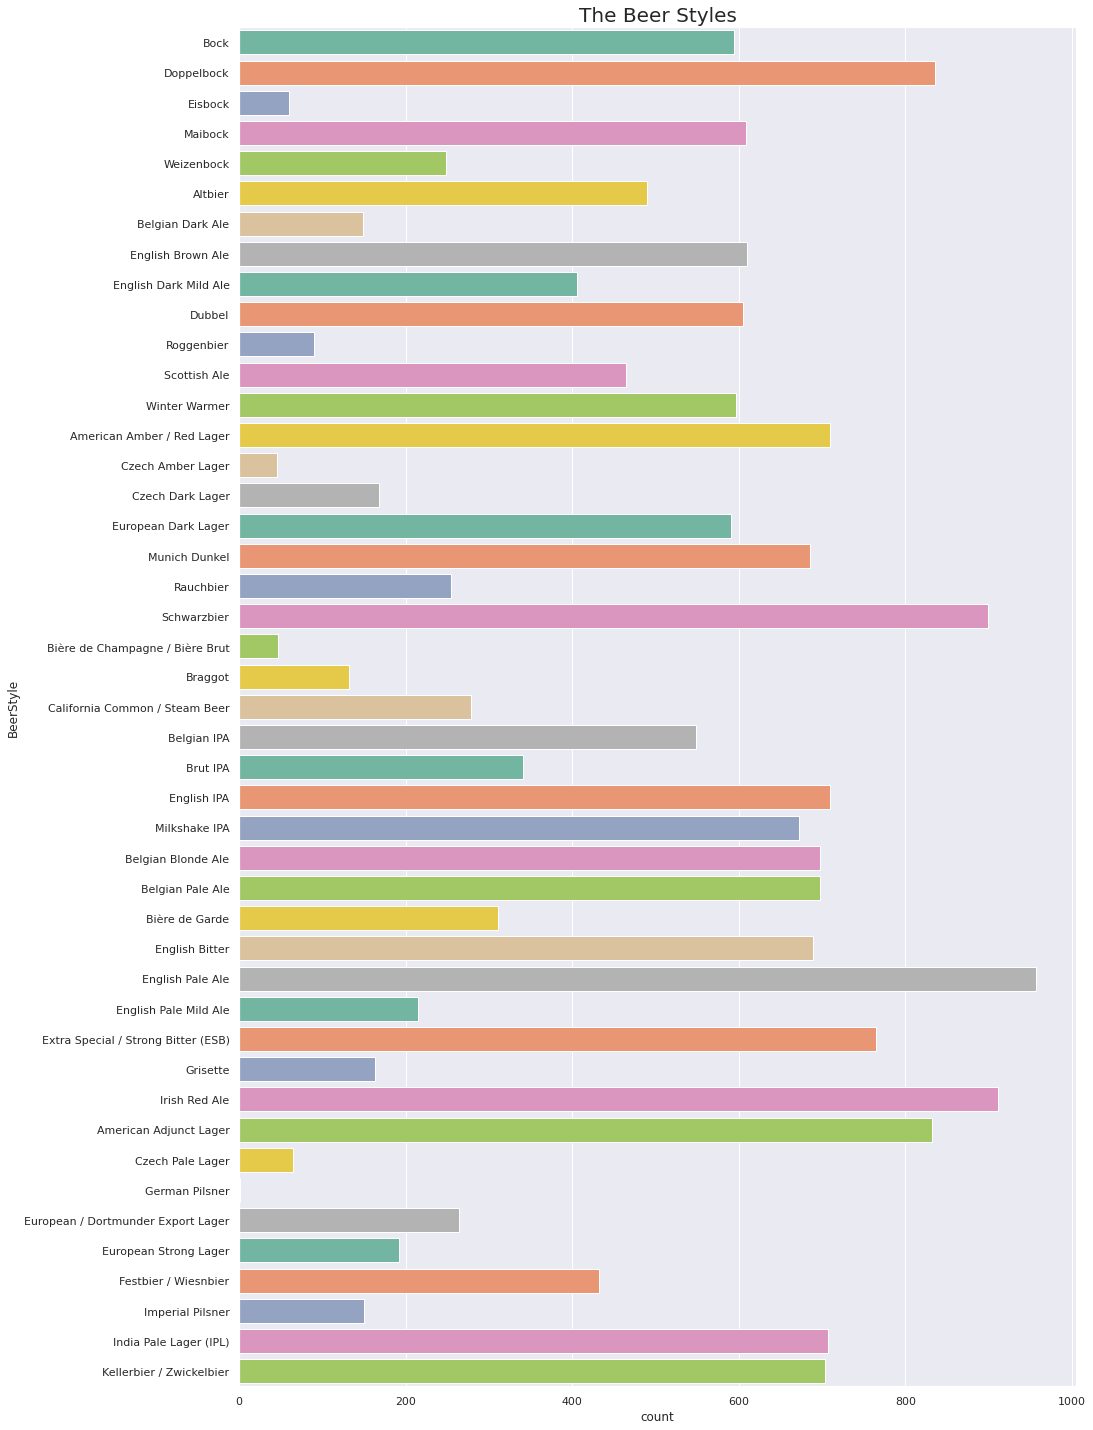

In [ ]:
def get_beer_region(dataframe):
    plt.figure(figsize=(15, 25))
    plt.title('The Beer Styles', fontsize = 20)
    sns.countplot(y='BeerStyle', data=dataframe, palette = "Set2")


get_beer_region(ideal_beers_df)

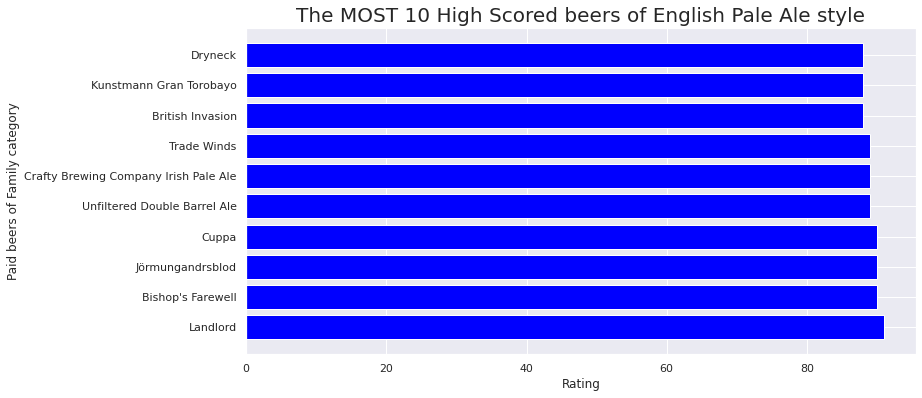

In [ ]:
def print_histograms(dataset, style, col):
    most_popular_pfa = dict(ideal_beers_df.loc[(ideal_beers_df['BeerStyle'] == style), ['BeerName', 'BeerScore']].nlargest(10, 'BeerScore').values)
    beers = list(most_popular_pfa.keys())
    rating = list(most_popular_pfa.values())
    fig = plt.figure(figsize = (12, 6))
    plt.barh(beers,rating, color=col)
    plt.title(f'The MOST 10 High Scored beers of {style} style', fontsize = 20)
    plt.ylabel('Paid beers of Family category')
    plt.xlabel('Rating')
    plt.show()


print_histograms(ideal_beers_df, 'English Pale Ale', 'blue')

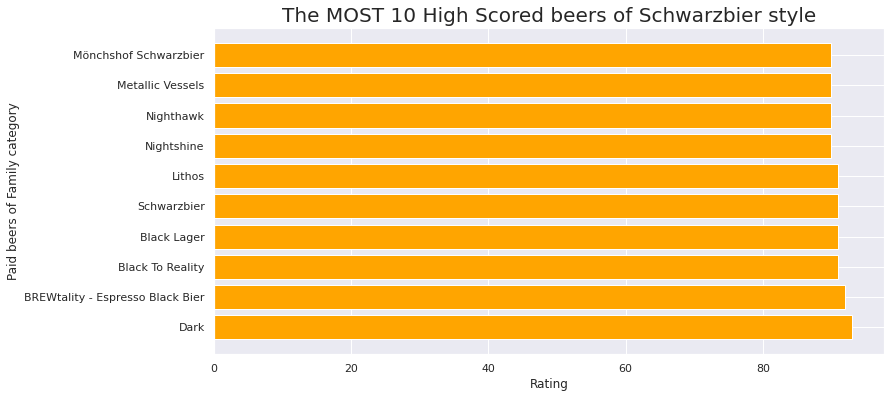

In [ ]:
print_histograms(ideal_beers_df, 'Schwarzbier', 'orange')

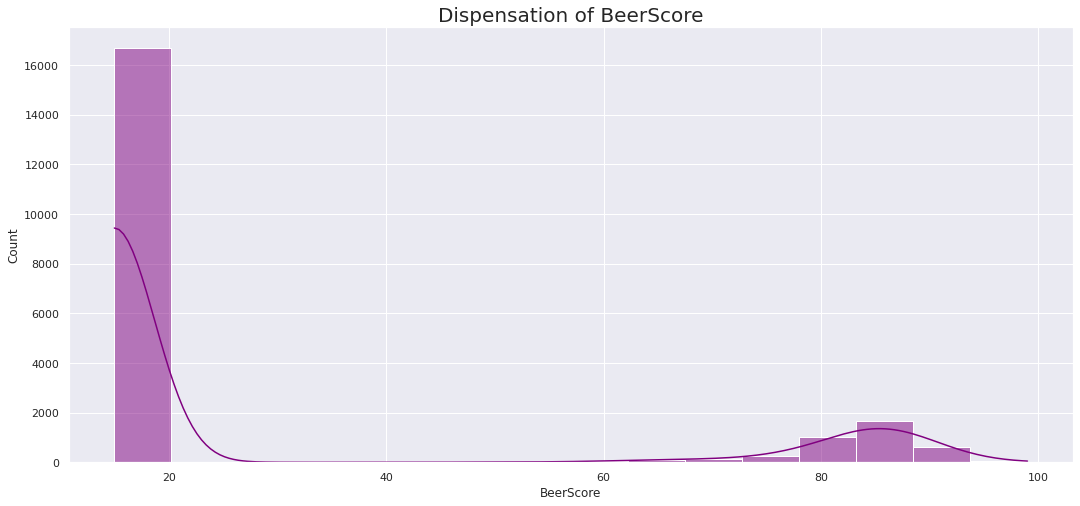

In [ ]:
def freq_of_ratings(dataset):
    plt.figure(figsize = (18, 8))
    plt.title('Dispensation of BeerScore', fontsize=20)
    sns.histplot(data=dataset, x="BeerScore", kde=True, color= "purple")
    plt.show()
    
    
freq_of_ratings(ideal_beers_df)

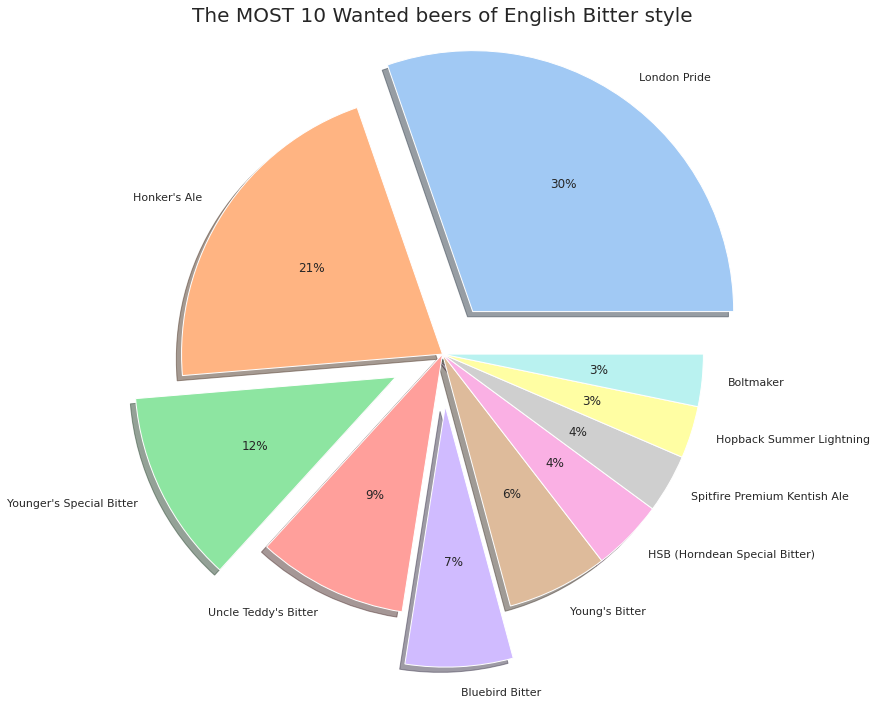

In [ ]:
def most_wanted_beers_of_style(dataset, style):
    most_popular_gen = dict(dataset.loc[(dataset['BeerStyle'] == style), ['BeerName', 'BeerWants']].nlargest(10, 'BeerWants').values)
    genres = list(most_popular_gen.keys())
    installs = list(most_popular_gen.values())
    colors = sns.color_palette('pastel')[0:len(genres)]
    fig = plt.figure(figsize = (15, 12))
    explode = (0.2, 0.0, 0.2, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0)
    plt.title(f'The MOST 10 Wanted beers of {style} style', fontsize = 20)
    plt.pie(installs, labels = genres, colors = colors, explode=explode, shadow=True, autopct='%.0f%%')
    plt.show()


most_wanted_beers_of_style(ideal_beers_df, 'English Bitter')

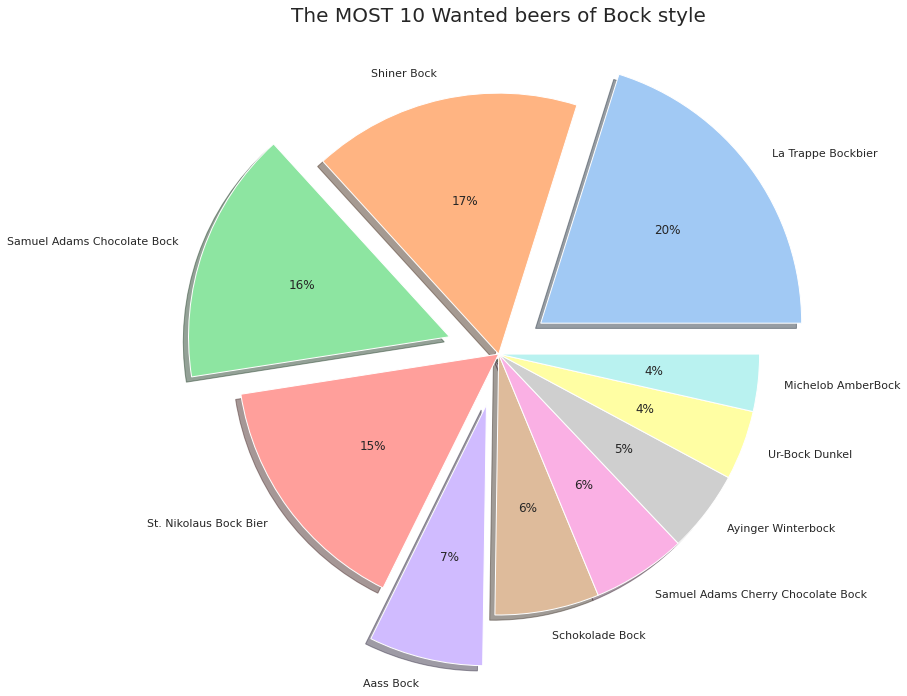

In [ ]:
most_wanted_beers_of_style(ideal_beers_df, 'Bock')

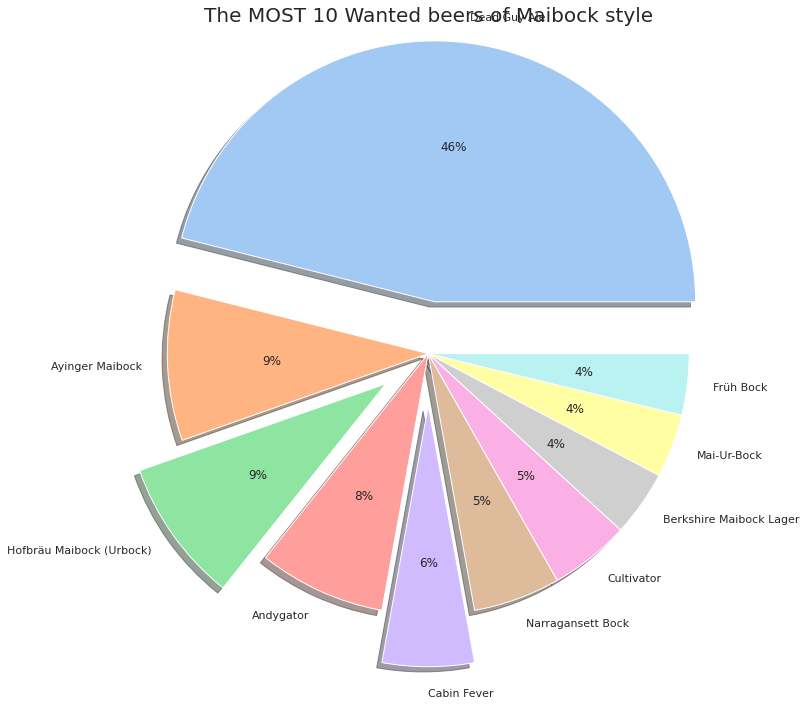

In [ ]:
most_wanted_beers_of_style(ideal_beers_df, 'Maibock')

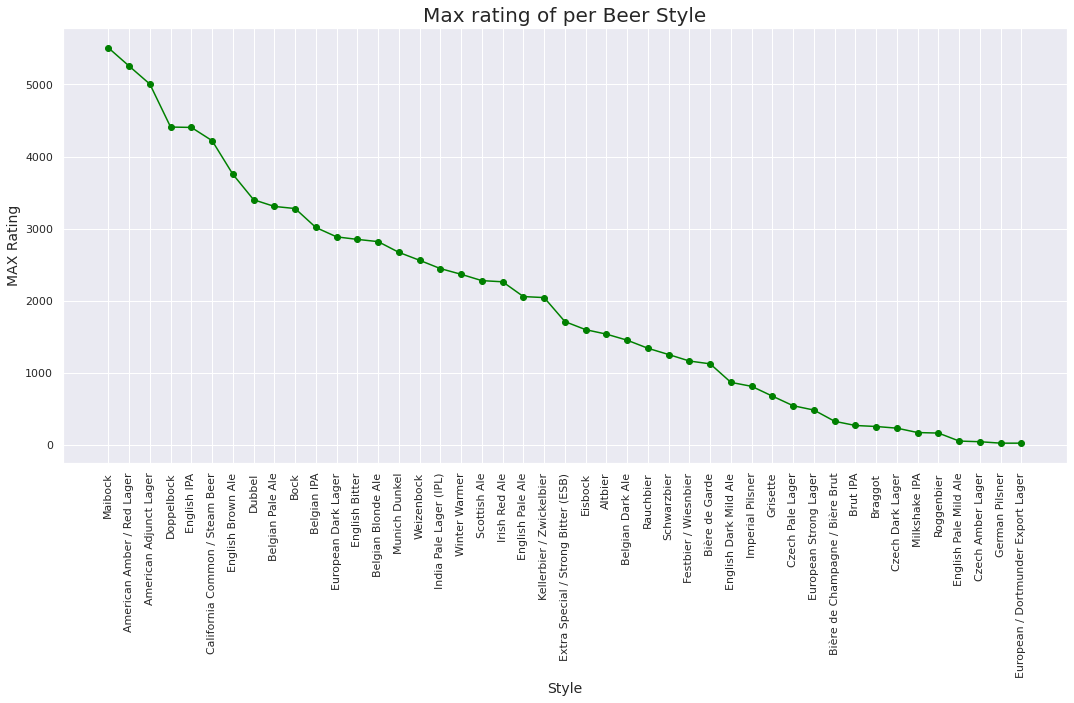

In [ ]:
def max_rating(dataset):
    rev = dataset.groupby('BeerStyle')[['BeerRating']].max().sort_values(by='BeerRating', ascending=False)
    cat = []
    rat = []
    for i in range(len(rev)):
        cat.append(rev.BeerRating[i])
        rat.append(rev.index[i])
    plt.figure(figsize = (18, 8))
    plt.plot(rat, cat, color='green', marker='o')
    plt.title('Max rating of per Beer Style', fontsize=20)
    plt.xlabel('Style', fontsize=14)
    plt.ylabel('MAX Rating', fontsize=14)
    plt.xticks(rotation=90)
    plt.grid(True)
    plt.show()


max_rating(ideal_beers_df)

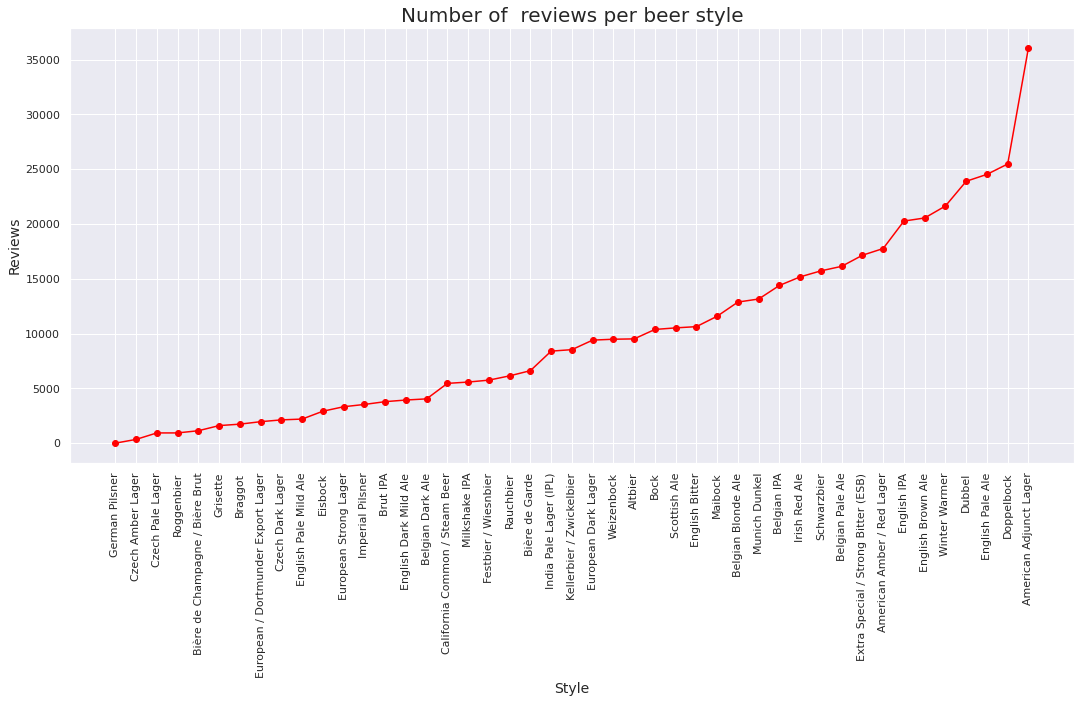

In [ ]:
def reviews_categ(dataset):
    rev = dataset.groupby('BeerStyle')[['BeerReviews']].sum().sort_values(by='BeerReviews', ascending=True)
    cat = []
    r = []
    for i in range(len(rev)):
        cat.append(rev.BeerReviews[i])
        r.append(rev.index[i])
    plt.figure(figsize = (18, 8))
    plt.plot(r, cat, color='red', marker='o')
    plt.title('Number of  reviews per beer style', fontsize=20)
    plt.xlabel('Style', fontsize=14)
    plt.ylabel('Reviews', fontsize=14)
    plt.xticks(rotation=90)
    plt.grid(True)
    plt.show()


reviews_categ(ideal_beers_df)

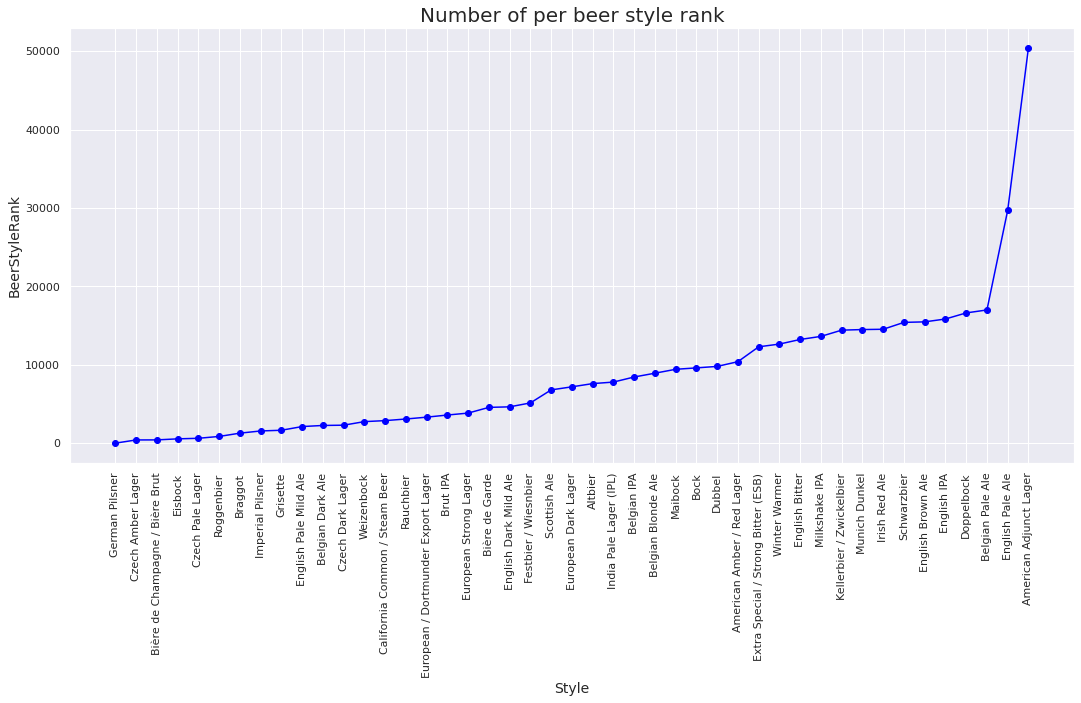

In [ ]:
def rank_perstyle(dataset):
    rev = dataset.groupby('BeerStyle')[['BeerStyleRank']].sum().sort_values(by='BeerStyleRank', ascending=True)
    cat = []
    r = []
    for i in range(len(rev)):
        cat.append(rev.BeerStyleRank[i])
        r.append(rev.index[i])
    plt.figure(figsize = (18, 8))
    plt.plot(r, cat, color='blue', marker='o')
    plt.title('Number of per beer style rank', fontsize=20)
    plt.xlabel('Style', fontsize=14)
    plt.ylabel('BeerStyleRank', fontsize=14)
    plt.xticks(rotation=90)
    plt.grid(True)
    plt.show()


rank_perstyle(ideal_beers_df)

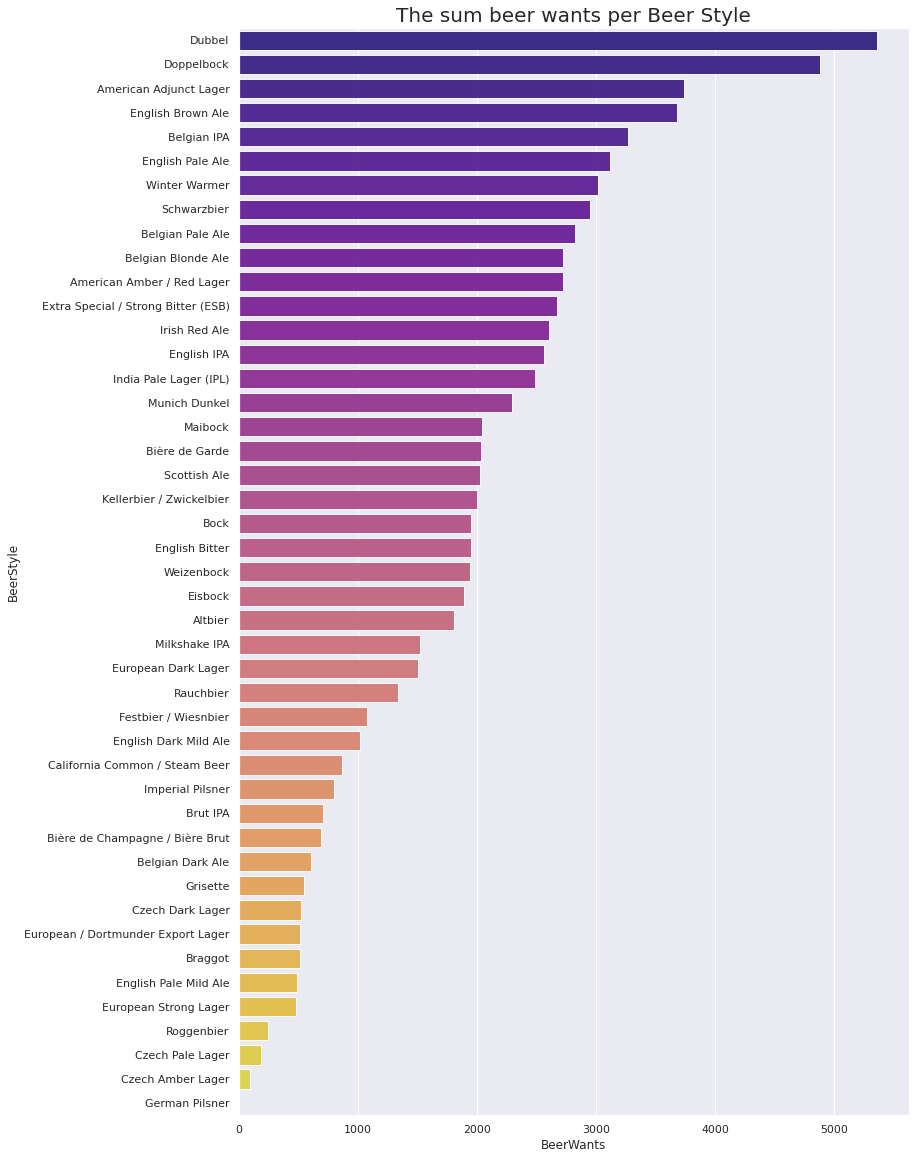

In [ ]:
def sum_beerwants_per_categ(dataset):
    mean_pr_categ = dataset.groupby('BeerStyle')[['BeerWants']].sum().sort_values(by='BeerWants', ascending=False)
    price = []
    categ = []
    for i in range(len(mean_pr_categ)):
        price.append(mean_pr_categ.BeerWants[i])
        categ.append(mean_pr_categ.index[i])
    plt.figure(figsize=(12,20))
    plt.xlabel("BeerWants")
    plt.ylabel("BeerStyle")
    graph = sns.barplot(x = price, y = categ, alpha =0.9, palette= "plasma")
    graph.set_title("The sum beer wants per Beer Style", fontsize = 20) 


sum_beerwants_per_categ(ideal_beers_df)

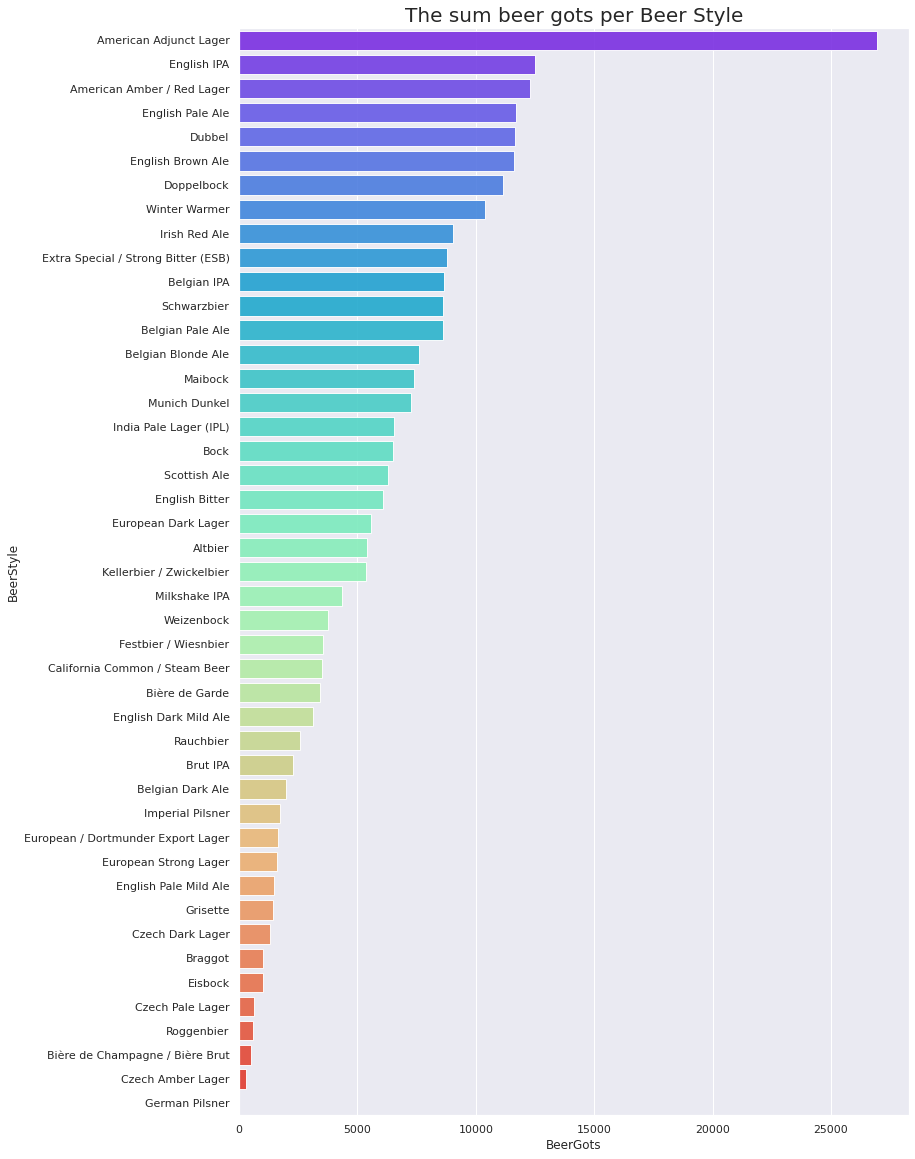

In [ ]:
def sum_beerwants_per_categ(dataset):
    mean_pr_categ = dataset.groupby('BeerStyle')[['BeerGots']].sum().sort_values(by='BeerGots', ascending=False)
    price = []
    categ = []
    for i in range(len(mean_pr_categ)):
        price.append(mean_pr_categ.BeerGots[i])
        categ.append(mean_pr_categ.index[i])
    plt.figure(figsize=(12,20))
    plt.xlabel("BeerGots")
    plt.ylabel("BeerStyle")
    graph = sns.barplot(x = price, y = categ, alpha =0.9, palette= "rainbow")
    graph.set_title("The sum beer gots per Beer Style", fontsize = 20) 


sum_beerwants_per_categ(ideal_beers_df)

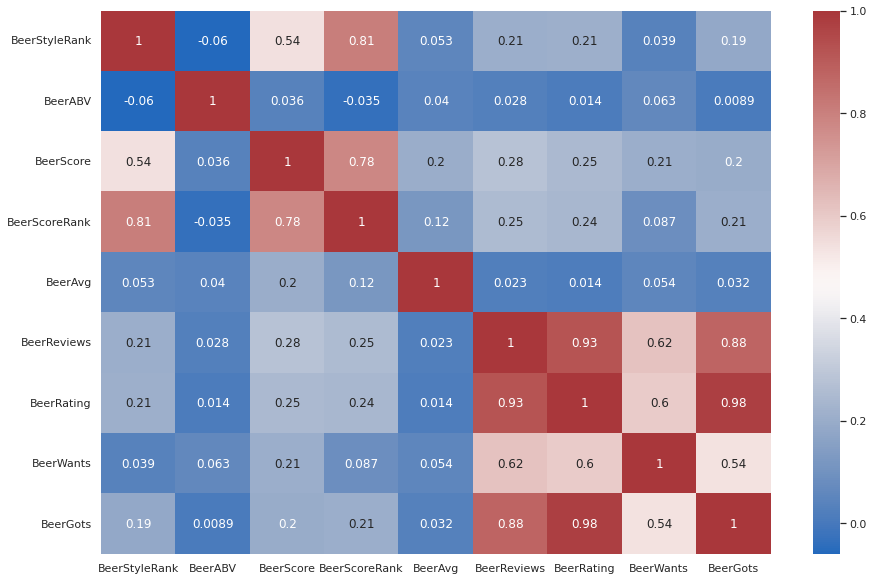

In [ ]:
def compute_correlations_matrix(dataset):
    corrMatrix = dataset.corr()
    plt.figure(figsize=(15,10))
    sns.heatmap(corrMatrix, annot=True, cmap='vlag')
    plt.show()


compute_correlations_matrix(ideal_beers_df)

# MACHINE LEARNING

In [ ]:
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [23]:
ideal_beers_df['index'] = ideal_beers_df.index

def combine_features(dataframe, sel_features):
    return dataframe[sel_features].astype(str).apply(lambda x: ''.join(x), axis=1)

In [ ]:
def vectorize(com_features):
    vectorizer = TfidfVectorizer()
    feature_vectors = vectorizer.fit_transform(com_features)
    return feature_vectors

In [ ]:
def similarity(vec):
    similarities = cosine_similarity(vec)
    return similarities

In [ ]:
def recommend(dataframe, similarities):
    beer_name = input('Enter your favourite beer name: ')

    list_of_all_titles = dataframe['BeerName'].tolist()
    find_close_match = difflib.get_close_matches(beer_name, list_of_all_titles)
    close_match = find_close_match[0]
    index_of_the_beer = dataframe[dataframe.BeerName == close_match]['index'].values[0]
    similarity_score = list(enumerate(similarities[index_of_the_beer]))
    sorted_similar_beers = sorted(similarity_score, key = lambda x:x[1], reverse = True) 
    print('Beers suggested for you: \n')
    i = 1
    for beer in sorted_similar_beers:
        index = beer[0]
        score = beer[1]
        title_from_index = dataframe[dataframe.index==index]['BeerName'].values[0]
        if i <= 10:
            print(f'{i:<2}. {title_from_index:<30} Similarity Score: {round(score*100)}')
            i += 1

In [ ]:
com_f = combine_features(ideal_beers_df, ['BreweryName', 'BreweryRegion', 'BeerStyle', 'BeerStyleRank', 'BeerABV', 'BeerScore', 'BeerScoreRank', 'BeerAvg', 'BeerReviews', 'BeerRating', 'BeerWants', 'BeerGots', 'BeerNotes', 'StyleDescribtion', 'StyleABV', 'StyleIBU'])

In [ ]:
vec = vectorize(com_f)

In [ ]:
simil = similarity(vec)

In [25]:
recommend(ideal_beers_df, simil)

# We can write any beers from this dataset, and it gives the similar beers
# Beers: Bock, Burkhart, In Bloom, Freiheit, ...

Enter your favourite beer name: Bock
Beers suggested for you: 

1 . Bock                           Similarity Score: 100
2 . Alpenbock                      Similarity Score: 81
3 . Mount Washington               Similarity Score: 79
4 . Sky Bock Lager                 Similarity Score: 79
5 . River Baptism Bock             Similarity Score: 78
6 . Bock Streat                    Similarity Score: 78
7 . Amongst The Stars              Similarity Score: 78
8 . Aaah Bock                      Similarity Score: 78
9 . Freezing Our Bocks Off!        Similarity Score: 78
10. Bock                           Similarity Score: 78
